<a href="https://colab.research.google.com/github/tejatanush/Customer-Segmentation-System/blob/main/Customer_Segmentation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer segmentation system
This model is capable of categorizing customers into distinct groups based on common characteristics, enabling personalized marketing strategies and improving customer satisfaction and retention.

# Steps to build a model:
1. Import required libraries  
2. Import dataset  
3. Data Preprocessing  
* Find and fill missing values  
* Encoding data  
* Feature Scaling  
4. Dimensionality Reduction  
5. Build a model  
6. K-Mean Clustering  
* Finding Optimal number of clusters    
* Build a K-Mean clustering model   
* Visualizing Clusters  
* Observing percentage of customers in each cluster  
* Evaluate K-Means cluster model  
** Silhouette score
** Davies bouldin score
7. Hierarchical Clustering  
* Finding Optimal number of clusters  
* Build a Hierarchical clustering model  
* Visualizing Clusters  
* Observing percentage of customers in each cluster  
* Evaluate Hierarchical cluster model  
** Silhouette score
** Davies bouldin score
8. Finalize the model
9. Cluster Analysis  
10. Profiling

# 1.Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2. Import Dataset
Here is reference of dataset  
Reference: https://www.kaggle.com/datasets/govindkrishnadas/segment  


In [4]:
dataset=pd.read_csv("Customer_Segmentation_System.csv")
x=dataset.iloc[:,1:].values        # Removing CustomerId column
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


A dataset without CustomerId column have been created and stored in x. Dataset is having 5 columns. First two columns does not make any sense for our clustering because CustomerId and gender may not plays a crucial role in basic shopping

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1599.0,800.000000,461.735855,1.0,400.5,800.0,1199.5,1599.0
Age,1599.0,46.944966,14.207764,18.0,35.0,46.0,59.0,78.0
Annual Income (k$),1599.0,80.292683,35.605253,15.0,50.5,78.0,110.0,145.0
Spending Score (1-100),1599.0,54.918074,25.567113,1.0,34.0,55.0,76.0,100.0


In [6]:
dataset.describe(include='object').T

,count,unique,top,freq
Gender,1599,2,Male,1138


Dataset is containing total of 1599 observation and of 5 columns. Some  analysis of data have been represented in above cells which may use in further steps.

#3. Data Preprocessing

# Handling Missing values

In [7]:
missing_values = dataset.isnull().sum()
print(missing_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


There are no missing values in this dataset so we can skip this step.

#Encoding categorical data  
Here we have only one column to encode (gender) so it can be done in single step.

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])
print(x[2])

[0 20 16 6]


 Our dataset contains a gender column which coms under categorical data we can encode it into 0 and 1 as there are only two genders male and female.

# Feature Scaling
Let's Normalize age,Annual Income, SpeningScore.Because these are having unique numerical values and by normalizing them model may understand better patterns between them.

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x[:,2]=sc.fit_transform(x[:,2].reshape(-1,1)).flatten()
x[:,3]=sc.fit_transform(x[:,3].reshape(-1,1)).flatten()
x[:,1]=sc.fit_transform(x[:,1].reshape(-1,1)).flatten()
print(x[2])

[0 0.033333333333333326 0.007692307692307693 0.050505050505050504]


So, the age,Annual Income, SpeningScore were normalized into values between 0 and 1.

#4. Dimensionality Reduction
In our dataset we are having less features but there may any possible dimensionalty reduction. So let's check and reduce dimensionalty if possible.  
Here we are going to use only 3 columns age, annual income, spending score because remaining two columns columnId and gender are not make any sense in clustering and they may also tends to bad results.

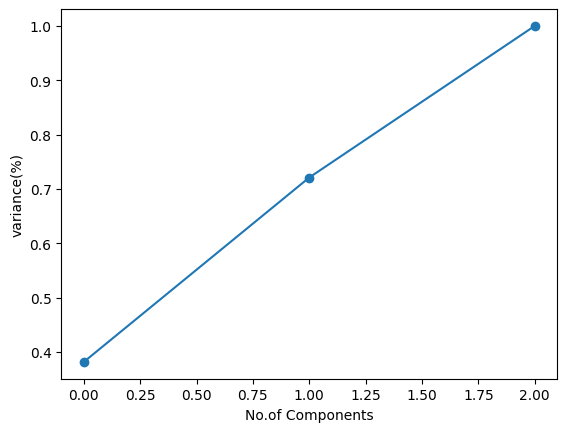

In [10]:
y=x[:,1:] # Considering only 3 columns age, annual income, spending score.
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(y)
explained_variance_ratio=pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio),marker='o',markersize=6)
plt.xlabel("No.of Components")
plt.ylabel("variance(%)")
plt.show()

There is no any perfect elbow point from the graph. so lets take all the features for clustering and no reduction in dimensionality.

#5. Build a model

# Let's build both the model K-Means clustering and Hierarchical clustering and finalize the model with good results.

# 6. K-Mean Clustering

# Finding Optimal number of clusters
Let's use elbow method to find optimal number of clusters to use in K-mean clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

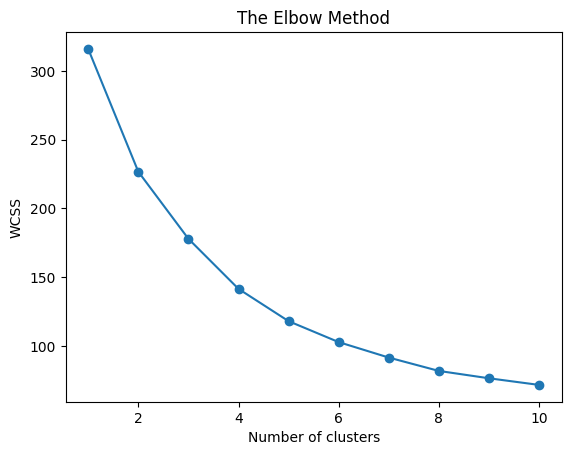

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(y)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the line bends near 4. So optimal number of clusters to use are 4.

# Build a K-Mean clustering model

In [12]:
kmeans=KMeans(n_clusters=4,random_state=42,init='k-means++',n_init=10)
y_kmeans=kmeans.fit_predict(y)

We have completed building the model using K-Means. Now let's visualize the clusters formed

# Visualizing Clusters

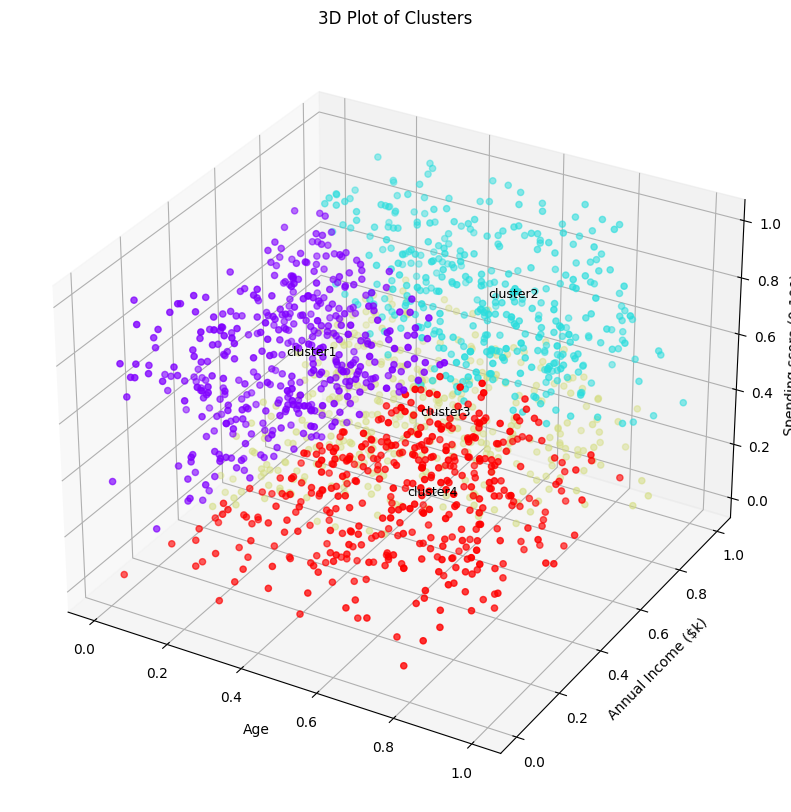

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(y[:,0],y[:,1],y[:,2],c=y_kmeans,cmap='rainbow')
for i in np.unique(y_kmeans):
  xi=y[y_kmeans==i,:]
  centroid=xi.mean(axis=0)
  ax.text(centroid[0],centroid[1],centroid[2],f'cluster{i+1}',fontsize=9)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ($k)')
ax.set_zlabel('Spending score (0-100)')

plt.title('3D Plot of Clusters')
plt.show()


Clusters are formed in a good manner but some of the points from one cluster look like near to another cluster.

# Observing percentage of customers in each cluster

In [14]:
sum_values=[]
for i in range(0,4):
  sum=0
  for j in y_kmeans==i:
    if j==True:
      sum=sum+1
    else:
      pass
  sum_values.append(sum)
total_customers=1599
percentage_of_customers_in_cluster1=(sum_values[0])*100/total_customers
percentage_of_customers_in_cluster2=(sum_values[1])*100/total_customers
percentage_of_customers_in_cluster3=(sum_values[2])*100/total_customers
percentage_of_customers_in_cluster4=(sum_values[3])*100/total_customers
print(f'percentage of customers in cluster1:{percentage_of_customers_in_cluster1}')
print(f'percentage of customers in cluster2:{percentage_of_customers_in_cluster2}')
print(f'percentage of customers in cluster3:{percentage_of_customers_in_cluster3}')
print(f'percentage of customers in cluster4:{percentage_of_customers_in_cluster4}')


percentage of customers in cluster1:25.953721075672295
percentage of customers in cluster2:24.140087554721703
percentage of customers in cluster3:24.140087554721703
percentage of customers in cluster4:25.766103814884303


We can see that cluster 1 are having more customer, cluster 2 and cluster 3 are having same and less number of customers, cluster 4 have moderate number of customers.

# Evaluate K-Means cluster model

# Silhouette score

In [15]:
from sklearn.metrics import silhouette_score
result=silhouette_score(y,y_kmeans)
print(result)

0.28347030372188703


# Davies bouldin score

In [16]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(y,y_kmeans)
print(score)

1.1470165479024594


We got silhouette score 0.283 and davies bouldin score 1.14 means that our model performed better.

Now lets build a hierarchical cluster model.

#7. Hierarchical Clustering

# Finding Optimal number of clusters
Let's use dendrogram to find optimal number of clusters to use in Hierarchical clustering.



[]

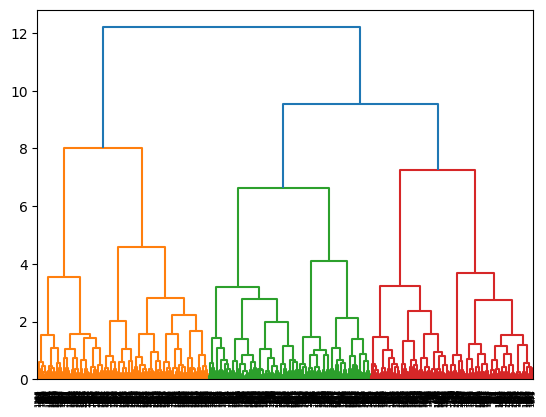

In [17]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(y,method='ward'))
plt.plot()

We can see that there are 2 optimal clusters.

# Build a Hierarchical clustering model

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,linkage='ward',metric='euclidean')
y_hc=hc.fit_predict(y)

# Visualising the clusters

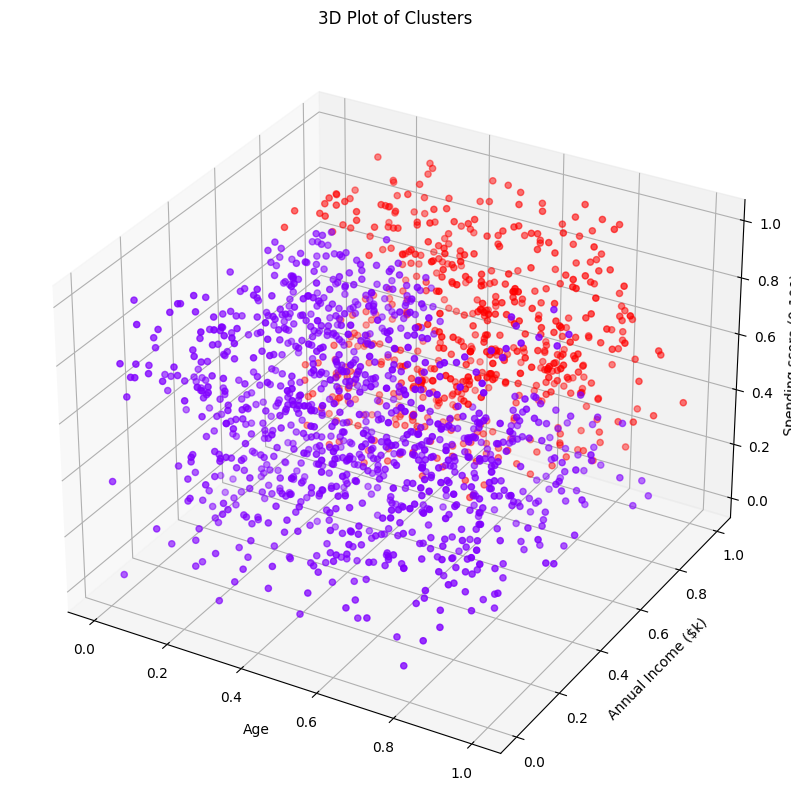

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(y[:,0],y[:,1],y[:,2],c=y_hc,cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ($k)')
ax.set_zlabel('Spending score (0-100)')

plt.title('3D Plot of Clusters')
plt.show()

# Observing percentage of customers in each cluster

In [20]:
sum_values=[]
for i in range(0,4):
  sum=0
  for j in y_hc==i:
    if j==True:
      sum=sum+1
    else:
      pass
  sum_values.append(sum)
total_customers=1599
percentage_of_customers_in_cluster1=(sum_values[0])*100/total_customers
percentage_of_customers_in_cluster2=(sum_values[1])*100/total_customers
print(f'percentage of customers in cluster1:{percentage_of_customers_in_cluster1}')
print(f'percentage of customers in cluster2:{percentage_of_customers_in_cluster2}')


percentage of customers in cluster1:65.35334584115071
percentage of customers in cluster2:34.64665415884928


# Evaluate Hierarchical cluster model

In [21]:
from sklearn.metrics import silhouette_score
result=silhouette_score(y,y_hc)
print(result)

0.22901566521955552


In [22]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(y,y_hc)
print(score)

1.6136769965025273


We got silhouette score 0.229 and davies bouldin score 1.613 means that our model performed better.

#8. Finalize the model

By observing the both silhouette score and davis bouldin score of both the models K-Means cluster model performs well than hierarchical model as it has low davies bouldin score and high silhouette score. So let's consider K-Means model is good for our cluster and proceed to further steps.

Now let's check the dependecy of each cluster on each feature by centroids of each K-Mean cluster and evaluating mean of every of point in the cluster.  
# 9. Cluster analysis

              Age                     Annual Income ($k)                      \
             mean    median       std               mean    median       std   
Cluster                                                                        
0        0.290482  0.266667  0.155023           0.319778  0.315385  0.160633   
1        0.582729  0.600000  0.206069           0.744101  0.753846  0.160362   
2        0.413687  0.383333  0.209015           0.718135  0.730769  0.175737   
3        0.646157  0.666667  0.187467           0.257207  0.246154  0.141886   

        Spending score (0-100)                      
                          mean    median       std  
Cluster                                             
0                     0.719411  0.747475  0.178251  
1                     0.758675  0.767677  0.152342  
2                     0.288376  0.282828  0.129058  
3                     0.408110  0.404040  0.189047  


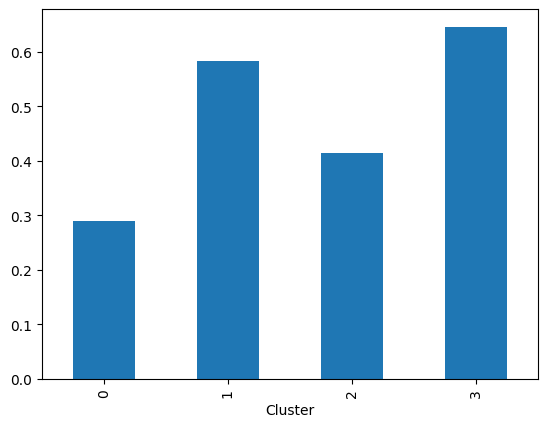

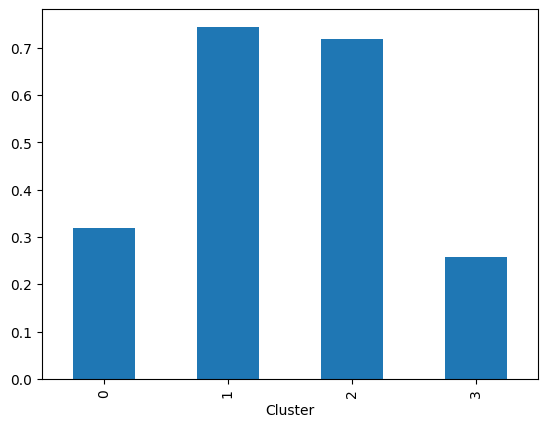

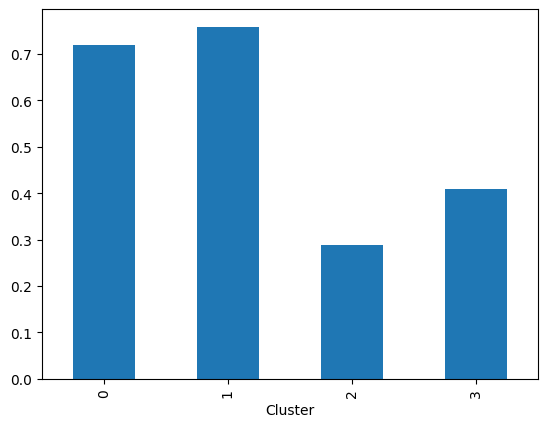

In [23]:
y_df = pd.DataFrame(y, columns=['Age', 'Annual Income ($k)', 'Spending score (0-100)'])
y_df['Cluster'] = y_kmeans
centroids=kmeans.cluster_centers_
cluster_stats=y_df.groupby('Cluster').agg(['mean','median','std'])
print(cluster_stats)
for feature in ['Age', 'Annual Income ($k)', 'Spending score (0-100)']:
    y_df.groupby('Cluster')[feature].mean().plot(kind='bar',label=feature)
    plt.show()

Here the first visualization shows age, second visualization shows annual income, third visualization shows spending score.X-axis shows clusers numbers and Y-axis shows mean of  cluster in respective feature.


# 10.Profiling

##CLUSTER-0: IMPULSIVE SPENDERS
This cluster is having the customers with moderate age,moderate income and high spending score. It mean this cluster contains the customers who are in youth age and having moderate annual income but spending lot's of money.
## CLUSTER-1: WEALTHY ELDERS  
This cluster is having high age, high annual income and high spending score. It mean this cluster contain customers who are very old aged and having high annual income and also  spending more money daily.
## CLUSTER-2: AFFLUENT MODERATES
This cluster is having moderate age, high annual income and moderate spending score.It mean this cluster contain customers who are middle aged, having high annual income and spending moderate money as per their needs in a planned way.
##CLUSTER-3:  STABLE RETIREES
This cluster is having high age, moderate annual income and moderate spending score. It mean this cluster contain customers who are old aged, having moderate income and moderate spending as per their needs.